# Open Government Data, Canton Zurich

### **Dataset**: COVID_19 Sterbeorte Kanton Zürich pro Tag ab 15.03.2020

### **Description**: Kumulierte Anzahl der Todesfälle im Kanton Zürich pro Tag seit Pandemiebeginn nach Art des Sterbeorts: 'Pflege- oder Altersheim', 'zuhause', 'Spital'. Die Daten werden einmal wöchentlich (jeweils am Mittwoch) aktualisiert.

*Autogenerated Jupyter Notebook and basic Python code for data set* **710@gesundheitsdirektion-kanton-zuerich**.

## Dataset profile
- **Issued** `2020-12-04T14:19:00`
- **Modified** `2022-03-15T12:39:47`
- **Startdate** `2020-03-15`
- **Enddate** `None`
- **Theme** `['Gesundheit']`
- **Keyword** `['altersheime', 'alterspflegeheime', 'gesundheit', 'kanton_zuerich', 'krankheiten', 'pflegeheime', 'spitaeler', 'todesfaelle', 'corona', 'covid-19', 'sars-cov-2', 'covid19', 'ogd']`
- **Publisher** `['Gesundheitsdirektion des Kantons Zürich']`
- **Landingpage** `https://github.com/openZH/covid_19/tree/master/fallzahlen_kanton_zh`


## Import Python modules

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

params = {
    'text.color': (0.25, 0.25, 0.25),
    'figure.figsize': [18, 6],
   }

plt.rcParams.update(params)

import pandas as pd 

## Load data

- The dataset has **`1` distribution(s)** in CSV format.
- All available CSV distributions are listed below and can be read into a pandas dataframe.

In [2]:
# Distribution 0
# Ktzhdistid               : 1773
# Title                    : COVID_19 Sterbeorte Kanton Zürich pro Tag ab 15.03.2020
# Description              : Variabeln: 'place_of_death' = Sterbeort ('care or nursing home' = Pflege- oder Altersheim, 'decedent's home' = zuhause, 'hospital' = Spital); 'ncumul_deceased' = Total der Todesfälle (kumuliert).
# Issued                   : 2020-12-03T18:42:33
# Modified                 : 2022-03-15T12:38:17
# Rights                   : NonCommercialAllowed-CommercialAllowed-ReferenceRequired

df = pd.read_csv('https://raw.githubusercontent.com/openZH/covid_19/master/fallzahlen_kanton_zh/COVID19_Sterbeorte_Kanton_ZH.csv', on_bad_lines='warn', encoding_errors='ignore')
if df.shape[1] <= 1:
    df = pd.read_csv('https://raw.githubusercontent.com/openZH/covid_19/master/fallzahlen_kanton_zh/COVID19_Sterbeorte_Kanton_ZH.csv', sep=';', on_bad_lines='warn', encoding_errors='ignore')

## Analyze data

In [3]:
# drop columns that have no values
df.dropna(how='all', axis=1, inplace=True)

In [4]:
print(f'The dataset has {df.shape[0]:,.0f} rows (observations) and {df.shape[1]:,.0f} columns (variables).')
print(f'There seem to be {df.duplicated().sum()} exact duplicates in the data.')

The dataset has 3,012 rows (observations) and 6 columns (variables).
There seem to be 0 exact duplicates in the data.


In [5]:
df.info(memory_usage='deep', verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3012 entries, 0 to 3011
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   date                        3012 non-null   object
 1   time                        3012 non-null   object
 2   abbreviation_canton_and_fl  3012 non-null   object
 3   place_of_death              3012 non-null   object
 4   ncumul_deceased             3012 non-null   int64 
 5   source                      3012 non-null   object
dtypes: int64(1), object(5)
memory usage: 1.1 MB


In [6]:
df.head()

,date,time,abbreviation_canton_and_fl,place_of_death,ncumul_deceased,source
0,2020-03-15,14:30,ZH,care or nursing home,1,https://gd.zh.ch/internet/gesundheitsdirektion...
1,2020-03-15,14:30,ZH,decedent's home,0,https://gd.zh.ch/internet/gesundheitsdirektion...
2,2020-03-15,14:30,ZH,hospital,0,https://gd.zh.ch/internet/gesundheitsdirektion...
3,2020-03-16,14:30,ZH,care or nursing home,1,https://gd.zh.ch/internet/gesundheitsdirektion...
4,2020-03-16,14:30,ZH,decedent's home,0,https://gd.zh.ch/internet/gesundheitsdirektion...


In [7]:
# display a small random sample transposed in order to see all variables
df.sample(3).T

,905,946,674
date,2021-01-10,2021-01-24,2020-10-25
time,14:30,14:30,14:30
abbreviation_canton_and_fl,ZH,ZH,ZH
place_of_death,hospital,decedent's home,hospital
ncumul_deceased,360,15,67
source,https://gd.zh.ch/internet/gesundheitsdirektion...,https://gd.zh.ch/internet/gesundheitsdirektion...,https://gd.zh.ch/internet/gesundheitsdirektion...


In [8]:
# describe non-numerical features
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(df.describe(exclude='number'))

,date,time,abbreviation_canton_and_fl,place_of_death,source
count,3012,3012,3012,3012,3012
unique,1004,1,1,3,1
top,2020-03-15,14:30,ZH,care or nursing home,https://gd.zh.ch/internet/gesundheitsdirektion...
freq,3,3012,3012,1004,3012


In [9]:
# describe numerical features
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(df.describe(include='number'))

,ncumul_deceased
count,"3,012.00"
mean,393.64
std,387.05
min,0.00
25%,28.00
50%,143.50
75%,818.00
max,996.00


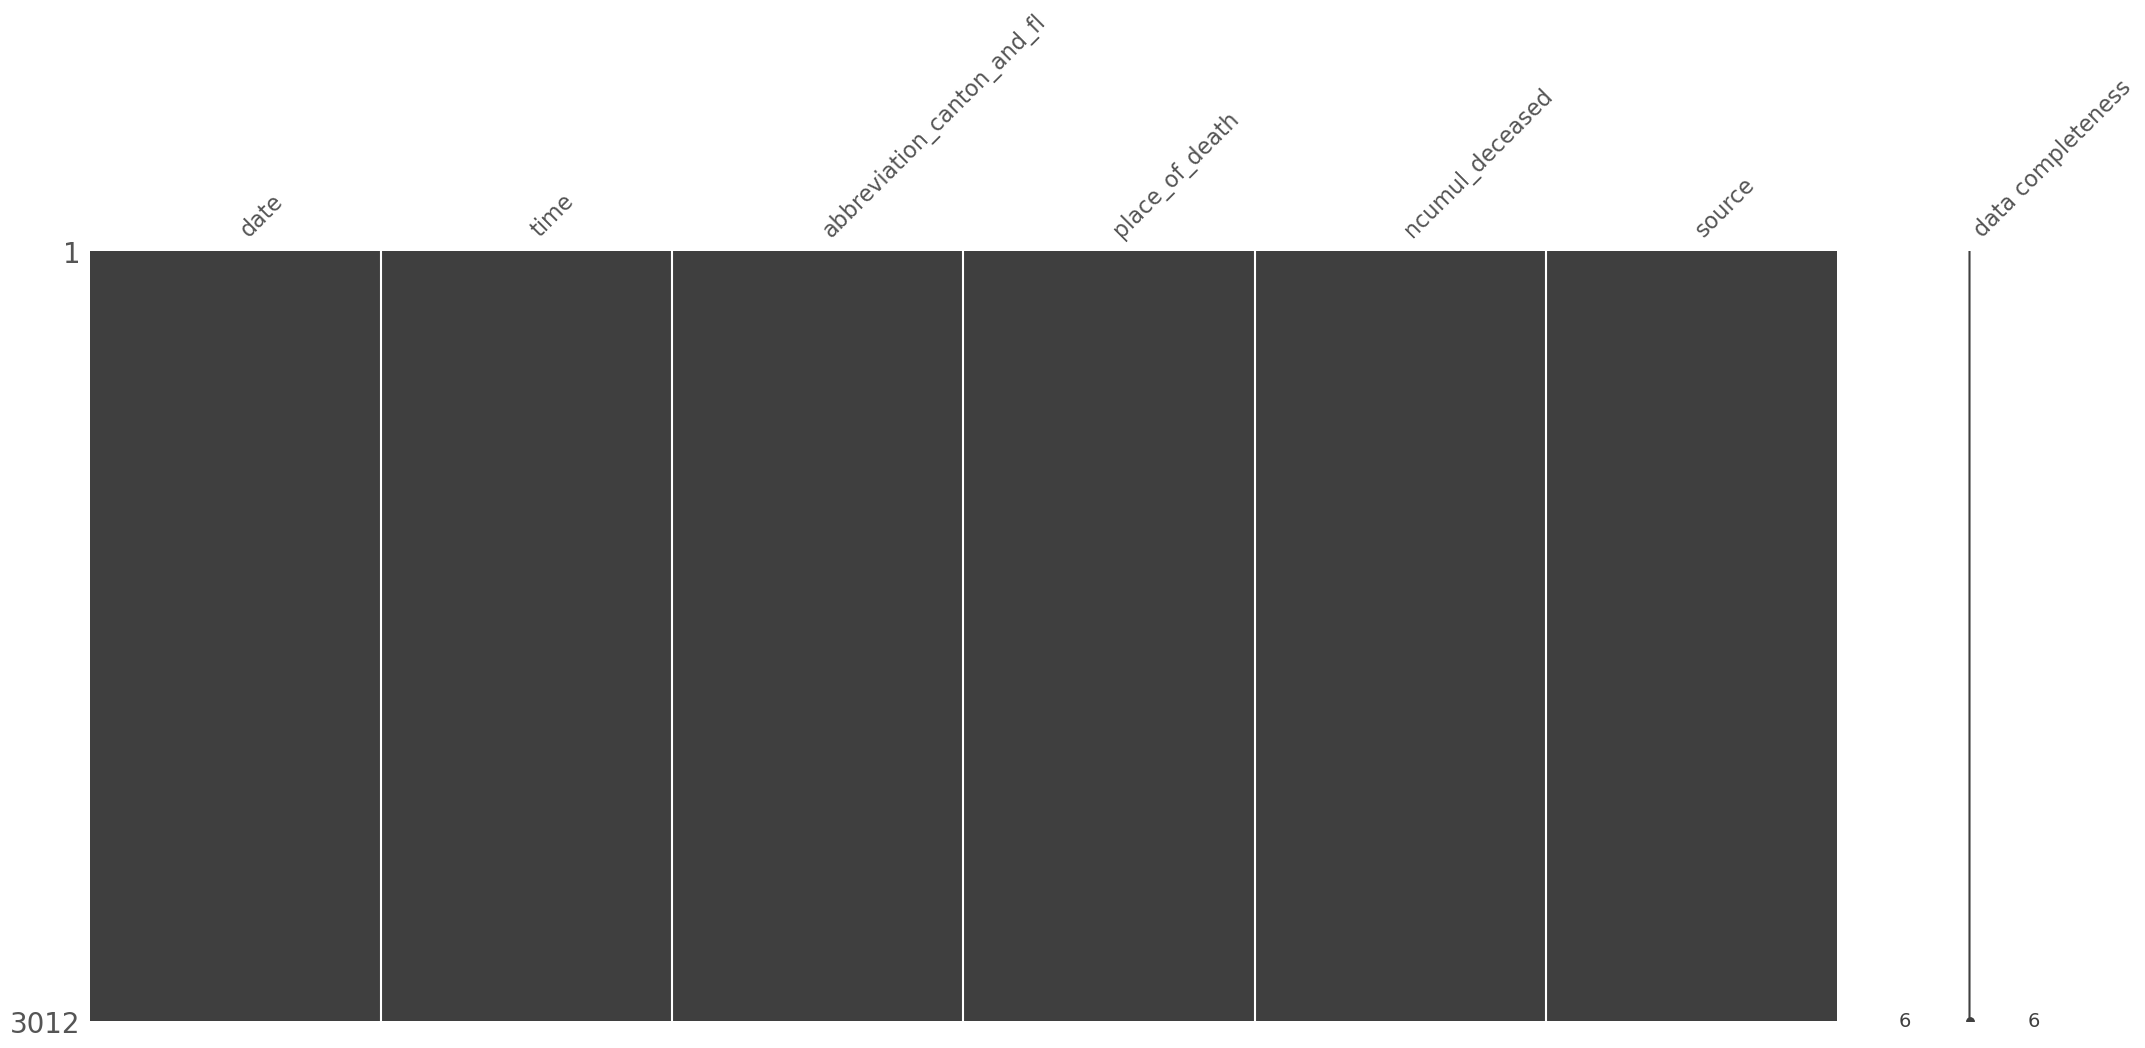

In [10]:
# check missing values with missingno
# https://github.com/ResidentMario/missingno
import missingno as msno
msno.matrix(df, labels=True, sort='descending');

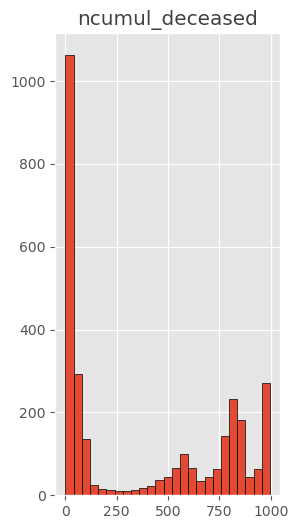

In [11]:
# plot a histogram for each numerical feature
df.hist(bins=25, layout=(-1, 5), edgecolor='black');

In [12]:
# continue your code here...

**Contact**: Gesundheitsdirektion des Kantons Zürich | Coronavirus-Hotline | gdstab@gd.zh.ch